# ASSIGNMENT 3

## GROUP MEMBERS

1. SYEINRITA DEVI ANBEALAGAN MCS221022
2. BAKUNGA BRONSON MCS232006
3. LINGGESH A/L TAMILMANI MCS232005

**MCSD2123 MASSIVE DATA MINING AND STREAMING**
- Due: 28th December 2023
- Mode: Group Assignment
- Submission: E-Learning

### Data Exploration & Preprocessing

In [136]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('IMDB Dataset.csv')

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

# Randomly choose 10,000 positive and 10,000 negative reviews
positive_reviews = positive_reviews.sample(n=10000, random_state=42)
negative_reviews = negative_reviews.sample(n=10000, random_state=42)

# Display the first few rows of positive and negative reviews
print("Positive Reviews (Sampled 10,000):")
print(positive_reviews.head())

print("\nNegative Reviews (Sampled 10,000):")
print(negative_reviews.head())


Positive Reviews (Sampled 10,000):
                                                  review sentiment
13886  I don't know how or why this film has a meager...  positive
48027  For a long time it seemed like all the good Ca...  positive
19536  Terry Gilliam's and David Peoples' teamed up t...  positive
27232  What is there to say about an anti-establishme...  positive
28001  This movie was made only 48 years after the en...  positive

Negative Reviews (Sampled 10,000):
                                                  review sentiment
13625  I was looking forward to seeing Bruce Willis i...  negative
48036  Bugs Bunny accidentally ends up at the South P...  negative
19126  I find it difficult to comprehend what makes v...  negative
27333  It's been said several times - not least by me...  negative
28075  New rule. Nobody is allowed to make any more Z...  negative


In [137]:
# Get the shape of the positive reviews DataFrame
shape_positive = positive_reviews.shape

# Print the positive reviews DataFrame shape
print('\nPositive Reviews DataFrame Shape:', shape_positive)

# Get and print the number of rows for positive reviews
num_rows_positive = shape_positive[0]
print('\nNumber of rows in Positive Reviews:', num_rows_positive)

# Get and print the number of columns for positive reviews
num_columns_positive = shape_positive[1]
print('\nNumber of columns in Positive Reviews:', num_columns_positive)

# Get the shape of the negative reviews DataFrame
shape_negative = negative_reviews.shape

# Print the negative reviews DataFrame shape
print('\nNegative Reviews DataFrame Shape:', shape_negative)

# Get and print the number of rows for negative reviews
num_rows_negative = shape_negative[0]
print('\nNumber of rows in Negative Reviews:', num_rows_negative)

# Get and print the number of columns for negative reviews
num_columns_negative = shape_negative[1]
print('\nNumber of columns in Negative Reviews:', num_columns_negative)



Positive Reviews DataFrame Shape: (10000, 2)

Number of rows in Positive Reviews: 10000

Number of columns in Positive Reviews: 2

Negative Reviews DataFrame Shape: (10000, 2)

Number of rows in Negative Reviews: 10000

Number of columns in Negative Reviews: 2


In [138]:
# Check for missing values in positive reviews DataFrame
missing_values_positive = positive_reviews.isnull().sum()

# Print the count of missing values in each column for positive reviews
print("\nNumber of missing values in Positive Reviews:")
print(missing_values_positive)

# Check for missing values in negative reviews DataFrame
missing_values_negative = negative_reviews.isnull().sum()

# Print the count of missing values in each column for negative reviews
print("\nNumber of missing values in Negative Reviews:")
print(missing_values_negative)



Number of missing values in Positive Reviews:
review       0
sentiment    0
dtype: int64

Number of missing values in Negative Reviews:
review       0
sentiment    0
dtype: int64


In [139]:
# Check for duplicates in positive reviews DataFrame
duplicate_rows_positive = positive_reviews.duplicated()
duplicate_count_positive = duplicate_rows_positive.sum()
print(f"Number of duplicate rows in Positive Reviews: {duplicate_count_positive}")

# Check for duplicates in negative reviews DataFrame
duplicate_rows_negative = negative_reviews.duplicated()
duplicate_count_negative = duplicate_rows_negative.sum()
print(f"Number of duplicate rows in Negative Reviews: {duplicate_count_negative}")


Number of duplicate rows in Positive Reviews: 22
Number of duplicate rows in Negative Reviews: 44


In [140]:
# Remove duplicates from positive reviews DataFrame
positive_reviews = positive_reviews.drop_duplicates()

# Remove duplicates from negative reviews DataFrame
negative_reviews = negative_reviews.drop_duplicates()


In [141]:
# Save cleaned positive reviews DataFrame to CSV
positive_reviews.to_csv('cleaned_positive_reviews.csv', index=False)

# Save cleaned negative reviews DataFrame to CSV
negative_reviews.to_csv('cleaned_negative_reviews.csv', index=False)


### Text Normalization

In [142]:
import re
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from contractions import contractions_dict
import contractions


# Function to fix contractions using the contractions library
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

# Function for text processing
def text_processing(review, default_replace=""):
    # Convert review to lowercase
    review = review.lower()
    
    # Remove HTML tags
    review = re.sub('<.*?>', default_replace, review)
    
    # Remove URLs
    review = re.sub('https?://\S+|www\.\S+', default_replace, review)   
    return review

# Function for custom tokenization
def custom_tokenize(review):
    token_list = word_tokenize(review)

    # Remove punctuation
    token_list = [token for token in token_list if token not in string.punctuation]

    # Keep alphabets only
    token_list = [token for token in token_list if token.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    token_list = [token for token in token_list if not token in stop_words]

    return token_list

# Function to stem tokens
def stem_tokens(tokens, stemmer):
    token_list = [stemmer.stem(token) for token in tokens]
    return token_list

# Function to process a review (combining the above functions)
def process_review(review):
    # Step 1: Text Processing
    review = text_processing(review)
    
    # Step 2: Expanding Contractions
    review = fix_contractions(review)
    
    # Step 3: Tokenization
    tokens = custom_tokenize(review)
    
    # Step 4: Stemming
    stemmer = SnowballStemmer("english")  # Define stemmer
    stem = stem_tokens(tokens, stemmer)  # Stem tokens
    
    # Step 5: Return the processed and tokenized review
    return stem

# Print tokenized words for a random subset of positive reviews
print("Tokenized words for positive reviews:")
for i in range(3):
    random_index = random.randint(0, len(positive_reviews))
    review = positive_reviews.iloc[random_index]["review"]
    print(process_review(review))
    print("\n")

# Print tokenized words for a random subset of negative reviews
print("Tokenized words for negative reviews:")
for i in range(3):
    random_index = random.randint(0, len(negative_reviews))
    review = negative_reviews.iloc[random_index]["review"]
    print(process_review(review))
    print("\n")

Tokenized words for positive reviews:
['saw', 'show', 'time', 'live', 'memori', 'frustrat', 'difficult', 'find', 'anywher', 'purchas', 'yet', 'seem', 'endless', 'repeat', 'stuff', 'like', 'friend', 'especi', 'even', 'difficult', 'obtain', 'england', 'guess', 'say', 'low', 'rate', 'complaint', 'bakersfield', 'pd', 'mayb', 'clever', 'certain', 'peopl', 'anyhow', 'one', 'comedi', 'would', 'love', 'see', 'almost', 'imposs', 'find', 'hear', 'repeat', 'anoth', 'network', 'ala', 'summari', 'ingeni']


['favorit', 'horror', 'film', 'close', 'saw', 'dark', 'night', 'first', 'came', 'theater', 'theater', 'born', 'certain', 'love', 'horror', 'film', 'despit', 'littl', 'date', 'dialog', 'well', 'written', 'thought', 'origin', 'phenomenon', 'vampir', 'address', 'least', 'knowledg', 'time', 'real', 'care', 'adam', 'west', 'noth', 'support', 'role', 'memor', 'thought', 'meg', 'tilli', 'good', 'cast', 'donald', 'hutton', 'mar', 'ambigu', 'scientist', 'oversaw', 'studi', 'ramar', 'abil', 'sad', 'overlo

In [143]:
# Applying the processing function to the DataFrame
positive_reviews["token"] = positive_reviews["review"].apply(process_review)
negative_reviews["token"] = negative_reviews["review"].apply(process_review)

# Display the positive reviews DataFrame
print("Positive Reviews DataFrame:")
print(positive_reviews.head())

# Display the negative reviews DataFrame
print("\nNegative Reviews DataFrame:")
print(negative_reviews.head())


Positive Reviews DataFrame:
                                                  review sentiment  \
13886  I don't know how or why this film has a meager...  positive   
48027  For a long time it seemed like all the good Ca...  positive   
19536  Terry Gilliam's and David Peoples' teamed up t...  positive   
27232  What is there to say about an anti-establishme...  positive   
28001  This movie was made only 48 years after the en...  positive   

                                                   token  
13886  [know, film, meager, rate, imdb, film, accompa...  
48027  [long, time, seem, like, good, canadian, actor...  
19536  [terri, gilliam, david, peopl, team, creat, on...  
27232  [say, film, produc, time, colourless, void, so...  
28001  [movi, made, year, end, civil, war, like, anti...  

Negative Reviews DataFrame:
                                                  review sentiment  \
13625  I was looking forward to seeing Bruce Willis i...  negative   
48036  Bugs Bunny accidental

### Exploratory Data Analysis (EDA)

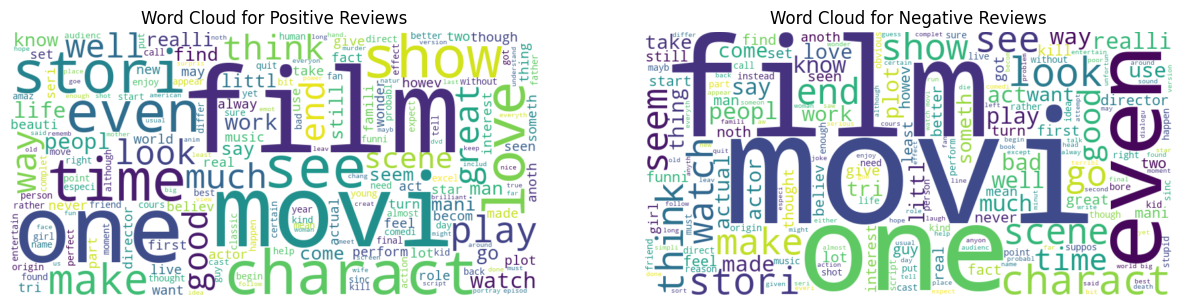

In [144]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tokenized_data_positive = positive_reviews['token']
tokenized_data_negative = negative_reviews['token']

# Combine the tokenized words into a single string for positive and negative reviews
all_tokens_positive = ' '.join([' '.join(tokens) for tokens in tokenized_data_positive])
all_tokens_negative = ' '.join([' '.join(tokens) for tokens in tokenized_data_negative])

# Generate the word clouds for positive and negative reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_negative)

# Display the word clouds using matplotlib
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


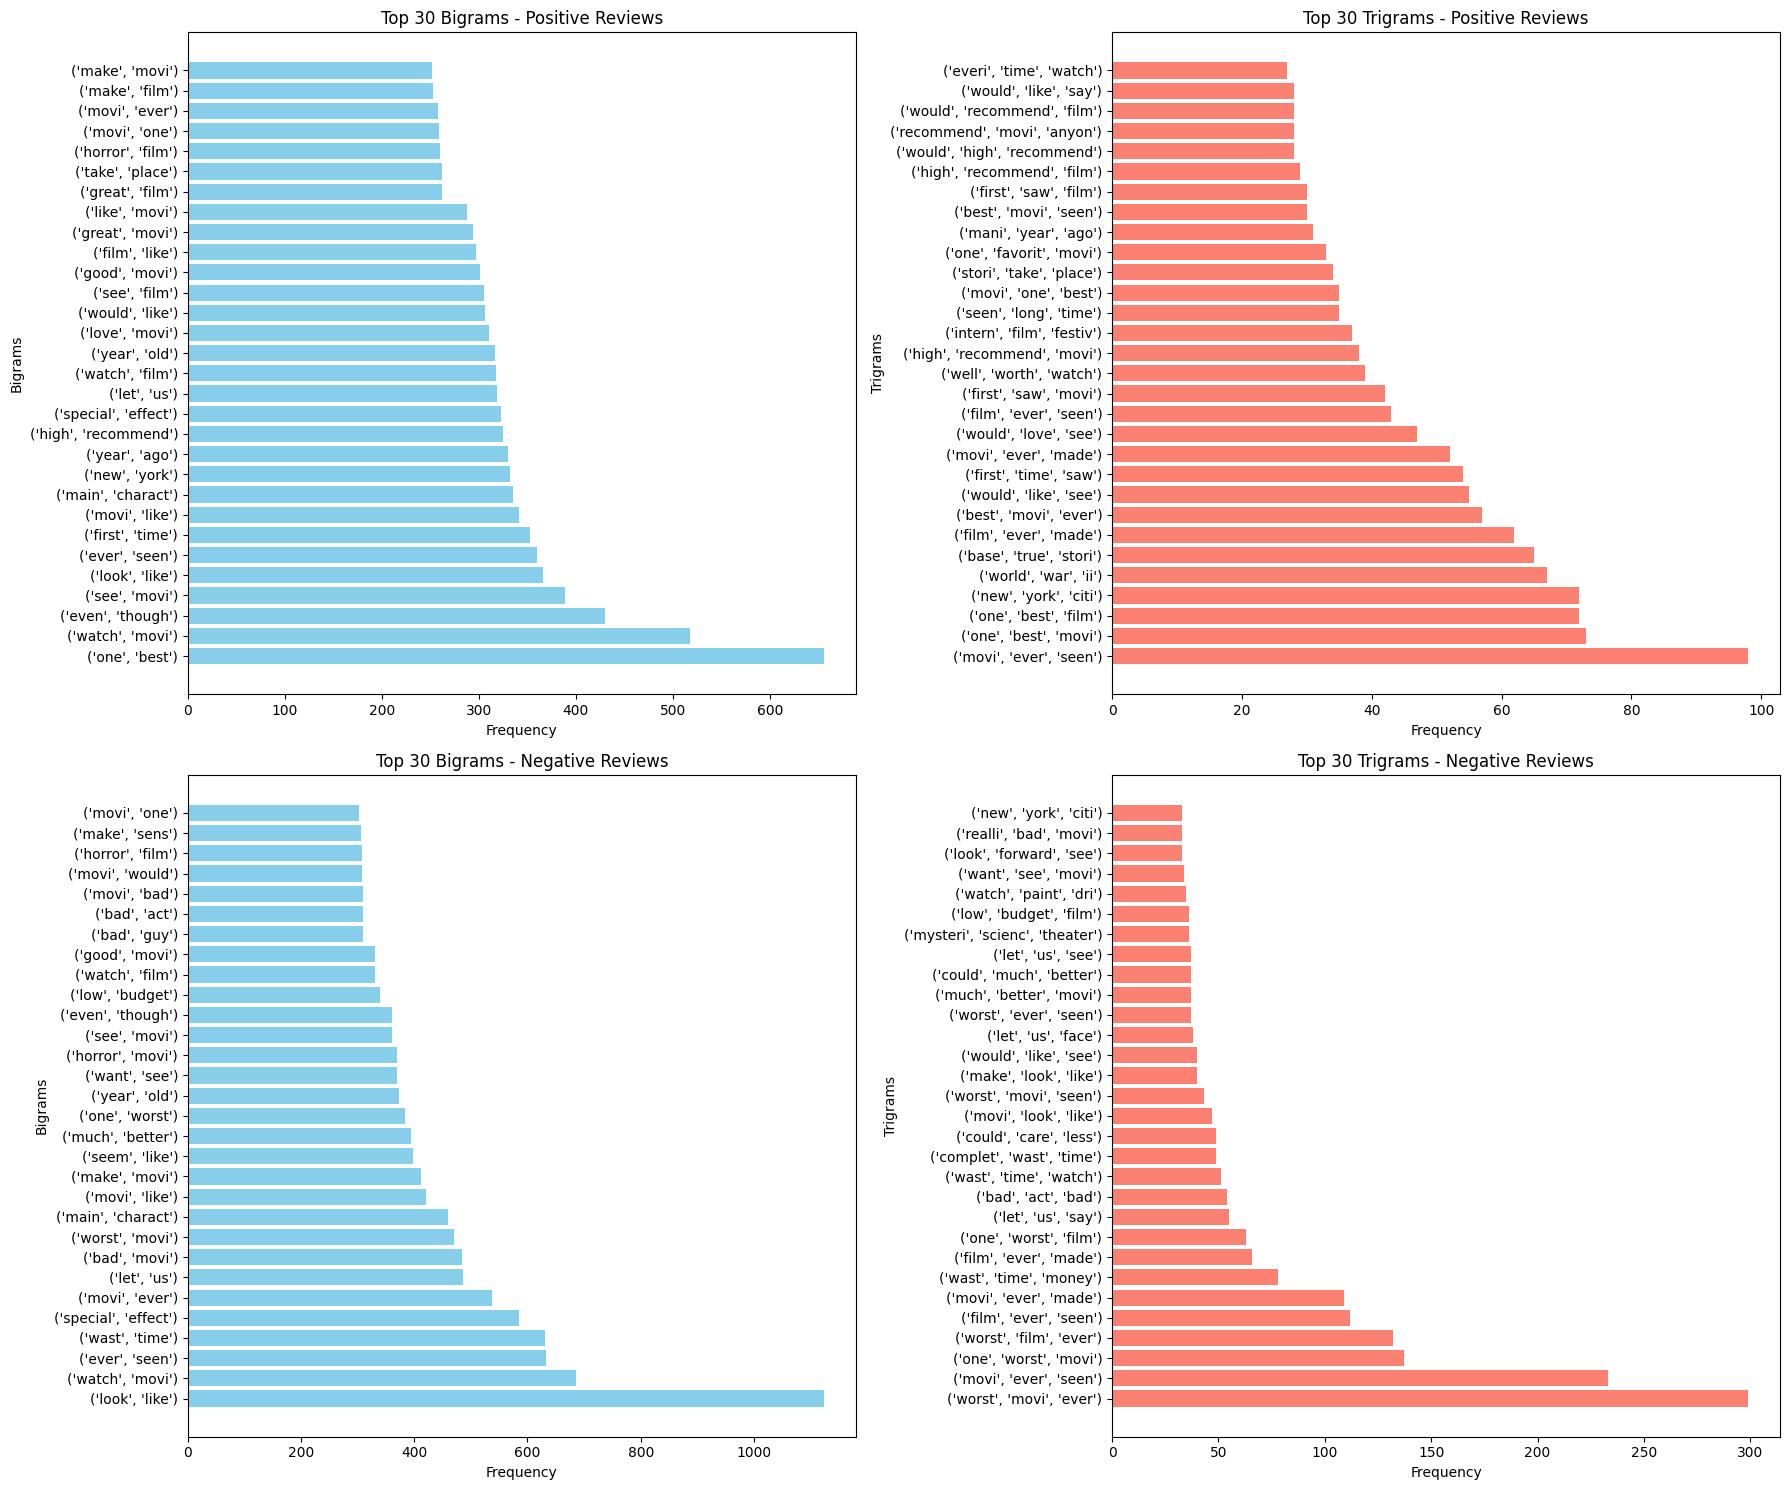

In [145]:
from nltk import bigrams, trigrams
from collections import Counter
import matplotlib.pyplot as plt

tokenized_data_positive = positive_reviews['token']
tokenized_data_negative = negative_reviews['token']

# Combine positive reviews for bigram and trigram extraction
all_reviews_bigrams_positive = list(bigrams([word for sublist in tokenized_data_positive for word in sublist]))
all_reviews_trigrams_positive = list(trigrams([word for sublist in tokenized_data_positive for word in sublist]))

# Combine negative reviews for bigram and trigram extraction
all_reviews_bigrams_negative = list(bigrams([word for sublist in tokenized_data_negative for word in sublist]))
all_reviews_trigrams_negative = list(trigrams([word for sublist in tokenized_data_negative for word in sublist]))

# Counters for positive reviews bigrams and trigrams
all_reviews_bigrams_counter_positive = Counter(all_reviews_bigrams_positive)
all_reviews_trigrams_counter_positive = Counter(all_reviews_trigrams_positive)

# Counters for negative reviews bigrams and trigrams
all_reviews_bigrams_counter_negative = Counter(all_reviews_bigrams_negative)
all_reviews_trigrams_counter_negative = Counter(all_reviews_trigrams_negative)

# Get the top 30 bigrams and trigrams for positive and negative reviews
top_30_bigrams_positive = all_reviews_bigrams_counter_positive.most_common(30)
top_30_trigrams_positive = all_reviews_trigrams_counter_positive.most_common(30)

top_30_bigrams_negative = all_reviews_bigrams_counter_negative.most_common(30)
top_30_trigrams_negative = all_reviews_trigrams_counter_negative.most_common(30)

# Plot bigrams and trigrams in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 15))

# Plot the top 30 bigrams for positive reviews
axes[0, 0].barh(range(len(top_30_bigrams_positive)), [count for bigram, count in top_30_bigrams_positive], color='skyblue')
axes[0, 0].set_yticks(range(len(top_30_bigrams_positive)))
axes[0, 0].set_yticklabels([bigram for bigram, count in top_30_bigrams_positive])
axes[0, 0].set_title('Top 30 Bigrams - Positive Reviews')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Bigrams')

# Plot the top 30 trigrams for positive reviews
axes[0, 1].barh(range(len(top_30_trigrams_positive)), [count for trigram, count in top_30_trigrams_positive], color='salmon')
axes[0, 1].set_yticks(range(len(top_30_trigrams_positive)))
axes[0, 1].set_yticklabels([trigram for trigram, count in top_30_trigrams_positive])
axes[0, 1].set_title('Top 30 Trigrams - Positive Reviews')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Trigrams')

# Plot the top 30 bigrams for negative reviews
axes[1, 0].barh(range(len(top_30_bigrams_negative)), [count for bigram, count in top_30_bigrams_negative], color='skyblue')
axes[1, 0].set_yticks(range(len(top_30_bigrams_negative)))
axes[1, 0].set_yticklabels([bigram for bigram, count in top_30_bigrams_negative])
axes[1, 0].set_title('Top 30 Bigrams - Negative Reviews')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Bigrams')

# Plot the top 30 trigrams for negative reviews
axes[1, 1].barh(range(len(top_30_trigrams_negative)), [count for trigram, count in top_30_trigrams_negative], color='salmon')
axes[1, 1].set_yticks(range(len(top_30_trigrams_negative)))
axes[1, 1].set_yticklabels([trigram for trigram, count in top_30_trigrams_negative])
axes[1, 1].set_title('Top 30 Trigrams - Negative Reviews')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Trigrams')

plt.tight_layout()
plt.show()


### Text Vectorization

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_data_positive = positive_reviews['review']
text_data_negative = negative_reviews['review']

# Initialize the TfidfVectorizer for positive reviews
tfidf_vectorizer_positive = TfidfVectorizer(max_features=5000)
tfidf_matrix_positive = tfidf_vectorizer_positive.fit_transform(text_data_positive)

# Initialize the TfidfVectorizer for negative reviews
tfidf_vectorizer_negative = TfidfVectorizer(max_features=5000)
tfidf_matrix_negative = tfidf_vectorizer_negative.fit_transform(text_data_negative)

# Convert the results to DataFrames (optional)
df_tfidf_positive = pd.DataFrame(tfidf_matrix_positive.toarray(), columns=tfidf_vectorizer_positive.get_feature_names_out())
df_tfidf_negative = pd.DataFrame(tfidf_matrix_negative.toarray(), columns=tfidf_vectorizer_negative.get_feature_names_out())

# Display the shape of the TF-IDF matrices for positive and negative reviews
print(f"Shape of TF-IDF matrix for Positive Reviews: {tfidf_matrix_positive.shape}")
print(f"Shape of TF-IDF matrix for Negative Reviews: {tfidf_matrix_negative.shape}")


Shape of TF-IDF matrix for Positive Reviews: (9978, 5000)
Shape of TF-IDF matrix for Negative Reviews: (9956, 5000)


In [147]:
from sklearn.decomposition import TruncatedSVD

# Apply dimensionality reduction based on previous approach
n_components = 50  
svd = TruncatedSVD(n_components=n_components)
tfidf_matrix_positive_reduced = svd.fit_transform(tfidf_matrix_positive)
tfidf_matrix_negative_reduced = svd.fit_transform(tfidf_matrix_negative)

## K Means

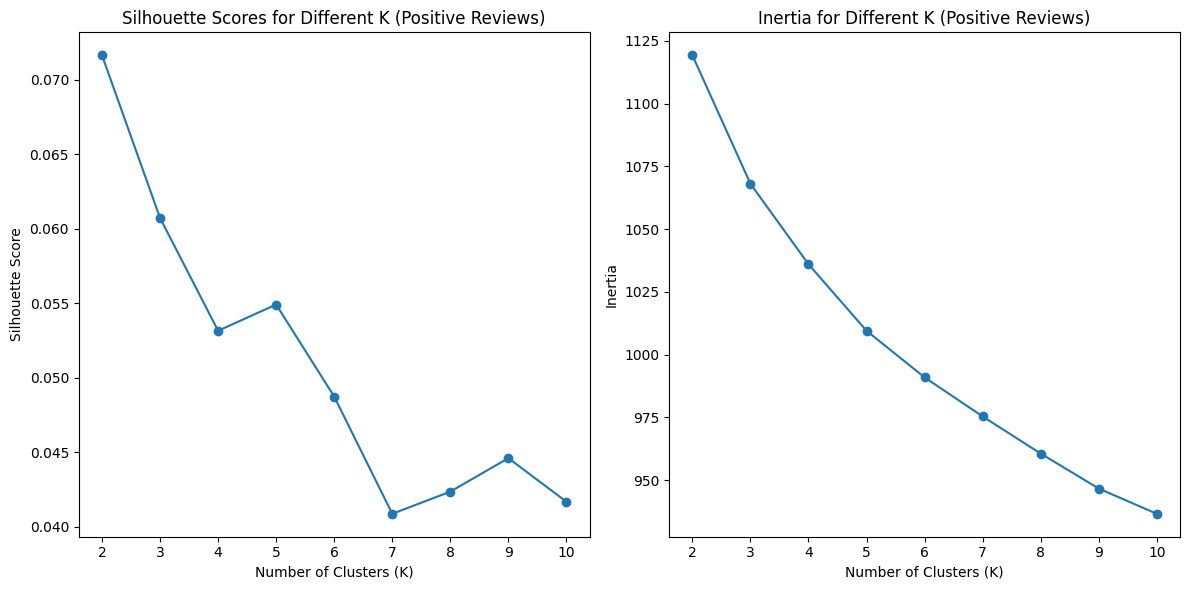

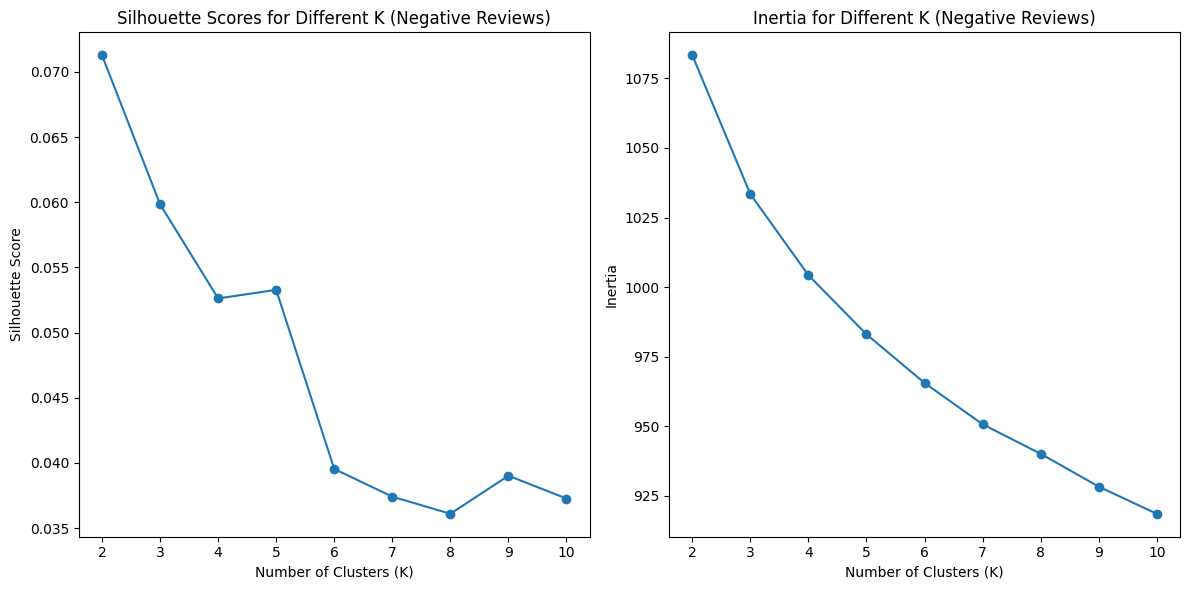

Results for Positive Reviews:
    K      Inertia  Silhouette Score
0   2  1119.258118          0.071632
1   3  1068.093281          0.060710
2   4  1036.045194          0.053140
3   5  1009.527258          0.054898
4   6   990.982995          0.048723
5   7   975.419053          0.040854
6   8   960.636565          0.042340
7   9   946.700429          0.044589
8  10   936.644848          0.041667

Results for Negative Reviews:
    K      Inertia  Silhouette Score
0   2  1083.291461          0.071279
1   3  1033.388560          0.059849
2   4  1004.302208          0.052620
3   5   983.061172          0.053279
4   6   965.591478          0.039536
5   7   950.758879          0.037413
6   8   940.154711          0.036096
7   9   928.356388          0.039016
8  10   918.595937          0.037266


In [148]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt


# Initialize lists to store inertia and silhouette scores for positive reviews
inertia_values_positive = []
silhouette_scores_positive = []

# Range of k values to try
k_values = range(2, 11)

# Loop through different k values for positive reviews
for k in k_values:
    # K-Means Clustering for positive reviews
    kmeans_positive = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    cluster_assignments_positive = kmeans_positive.fit_predict(tfidf_matrix_positive_reduced)

    # Calculate silhouette score for positive reviews
    silhouette_positive = silhouette_score(tfidf_matrix_positive_reduced, cluster_assignments_positive)
    silhouette_scores_positive.append(silhouette_positive)

    # Calculate inertia for positive reviews
    inertia_positive = kmeans_positive.inertia_
    inertia_values_positive.append(inertia_positive)

# Initialize lists to store inertia and silhouette scores for negative reviews
inertia_values_negative = []
silhouette_scores_negative = []

# Loop through different k values for negative reviews
for k in k_values:
    # K-Means Clustering for negative reviews
    kmeans_negative = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    cluster_assignments_negative = kmeans_negative.fit_predict(tfidf_matrix_negative_reduced)

    # Calculate silhouette score for negative reviews
    silhouette_negative = silhouette_score(tfidf_matrix_negative_reduced, cluster_assignments_negative)
    silhouette_scores_negative.append(silhouette_negative)

    # Calculate inertia for negative reviews
    inertia_negative = kmeans_negative.inertia_
    inertia_values_negative.append(inertia_negative)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores for positive reviews
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_positive, marker='o')
plt.title('Silhouette Scores for Different K (Positive Reviews)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Plot Inertia for positive reviews
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values_positive, marker='o')
plt.title('Inertia for Different K (Positive Reviews)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Plotting the results for negative reviews
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores for negative reviews
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_negative, marker='o')
plt.title('Silhouette Scores for Different K (Negative Reviews)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Plot Inertia for negative reviews
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values_negative, marker='o')
plt.title('Inertia for Different K (Negative Reviews)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Display the list of inertia and silhouette score for each k for positive reviews
result_df_positive = pd.DataFrame({'K': k_values, 'Inertia': inertia_values_positive, 'Silhouette Score': silhouette_scores_positive})
print("Results for Positive Reviews:")
print(result_df_positive)

# Display the list of inertia and silhouette score for each k for negative reviews
result_df_negative = pd.DataFrame({'K': k_values, 'Inertia': inertia_values_negative, 'Silhouette Score': silhouette_scores_negative})
print("\nResults for Negative Reviews:")
print(result_df_negative)


In [151]:
from sklearn.cluster import KMeans
import pandas as pd

k = 2

# Step 2: KMeans Clustering with k=2 for positive reviews
kmeans_positive = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
positive_reviews['cluster_kmeans'] = kmeans_positive.fit_predict(tfidf_matrix_positive_reduced)

# Get the labels and cluster centers for positive reviews
kmean_labels_positive = kmeans_positive.labels_
kmean_cluster_centers_positive = kmeans_positive.cluster_centers_

# Step 2: KMeans Clustering with k=2 for negative reviews
kmeans_negative = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
negative_reviews['cluster_kmeans'] = kmeans_negative.fit_predict(tfidf_matrix_negative_reduced)

# Get the labels and cluster centers for negative reviews
kmean_labels_negative = kmeans_negative.labels_
kmean_cluster_centers_negative = kmeans_negative.cluster_centers_

# Display the labels and cluster centers for positive and negative reviews
print("Labels for Positive Reviews:")
print(kmean_labels_positive)

print("\nCluster Centers for Positive Reviews:")
print(kmean_cluster_centers_positive)

print("\nLabels for Negative Reviews:")
print(kmean_labels_negative)

print("\nCluster Centers for Negative Reviews:")
print(kmean_cluster_centers_negative)


Labels for Positive Reviews:
[1 1 1 ... 0 0 1]

Cluster Centers for Positive Reviews:
[[ 3.45821688e-01 -6.75639123e-02  1.12058522e-02  7.33175361e-03
  -2.86134529e-03  2.81566359e-03  3.06865465e-03  6.21702670e-03
   8.86263695e-03 -7.27504164e-04  3.83217048e-03  6.86152071e-03
   2.33927454e-03  3.55725375e-03  3.47011555e-03  1.50778064e-03
   4.33539084e-04  2.51676060e-03  5.87075998e-04 -1.22679429e-03
   9.87073271e-04 -6.73681798e-04  3.00978746e-04  1.15716344e-03
   5.13472092e-04  1.90429775e-03  6.69830035e-04  1.01486795e-03
   5.93086365e-04 -6.75049339e-04 -1.51460853e-03  1.48237227e-03
   8.39960434e-04 -4.89332705e-04 -8.17131378e-04 -2.62790462e-05
  -1.04945171e-03  9.63269926e-04  9.43775336e-04 -2.72368107e-04
   8.99157159e-04  1.23829625e-03  2.69556305e-04 -1.41521703e-04
  -9.39731261e-05 -4.89207414e-04  8.48801957e-04 -1.41402211e-04
  -8.89932456e-05  2.46371513e-04]
 [ 4.75828877e-01  7.10913318e-02 -5.28996209e-03 -3.92572164e-03
   1.88613842e-03 -1.

In [152]:
# Count occurrences of each cluster label for positive reviews
cluster_counts_positive = positive_reviews['cluster_kmeans'].value_counts()

# Display the counts for positive reviews
print("Cluster Counts for Positive Reviews:")
for label, count in cluster_counts_positive.items():
    print(f"Cluster {label}: {count} instances")

# Count occurrences of each cluster label for negative reviews
cluster_counts_negative = negative_reviews['cluster_kmeans'].value_counts()

# Display the counts for negative reviews
print("\nCluster Counts for Negative Reviews:")
for label, count in cluster_counts_negative.items():
    print(f"Cluster {label}: {count} instances")


Cluster Counts for Positive Reviews:
Cluster 0: 5570 instances
Cluster 1: 4408 instances

Cluster Counts for Negative Reviews:
Cluster 1: 5706 instances
Cluster 0: 4250 instances


In [156]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Initialize cohesion
cohesion_kmeans_positive = 0
cohestion_kmeans_negative = 0

# Calculate the cohesion as the sum of the distances from each point to the center of its cluster
for i in range(kmeans_positive.n_clusters):
    # Points in the current cluster
    points_in_cluster = tfidf_matrix_positive_reduced[kmean_labels_positive == i]

    # Center of the current cluster
    cluster_center = kmeans_positive.cluster_centers_[i]

    # Sum of distances of points in the cluster to the cluster center
    cohesion_kmeans_positive += np.sum(np.linalg.norm(points_in_cluster - cluster_center, axis=1))

# Calculate the cohesion as the sum of the distances from each point to the center of its cluster
for i in range(kmeans_positive.n_clusters):
    # Points in the current cluster
    points_in_cluster = tfidf_matrix_negative_reduced[kmean_labels_negative == i]

    # Center of the current cluster
    cluster_center = kmeans_positive.cluster_centers_[i]

    # Sum of distances of points in the cluster to the cluster center
    cohesion_kmeans_negative += np.sum(np.linalg.norm(points_in_cluster - cluster_center, axis=1))

# If 'centroid_distances_positive' and 'centroid_distances_negative' are 2D matrices
# where each row corresponds to a centroid and each column corresponds to a distance to other centroids

# We first set the diagonal to np.inf to avoid zero distance to the centroid itself
np.fill_diagonal(centroid_distances_positive, np.inf)
np.fill_diagonal(centroid_distances_negative, np.inf)

# Then we can calculate the minimum distance from each centroid to all other centroids
min_distances_positive = np.min(centroid_distances_positive, axis=1)
min_distances_negative = np.min(centroid_distances_negative, axis=1)

# Calculate the separation as the average of these minimum distances
separation_kmeans_positive = np.mean(min_distances_positive)
separation_kmeans_negative = np.mean(min_distances_negative)

# Print the Metrics for positive reviews
print(f"Cohesion Kmeans: {cohesion_kmeans_positive}")
print(f"Separation Kmeans: {separation_kmeans_positive}")

# Print the Metrics for negative reviews
print(f"Cohesion Kmeans: {cohesion_kmeans_negative}")
print(f"Separation Kmeans: {separation_kmeans_negative}")


Cohesion Kmeans: 3279.542036796408
Separation Kmeans: 0.19280319560209214
Cohesion Kmeans: 11181.608078545705
Separation Kmeans: 0.18819718628642892


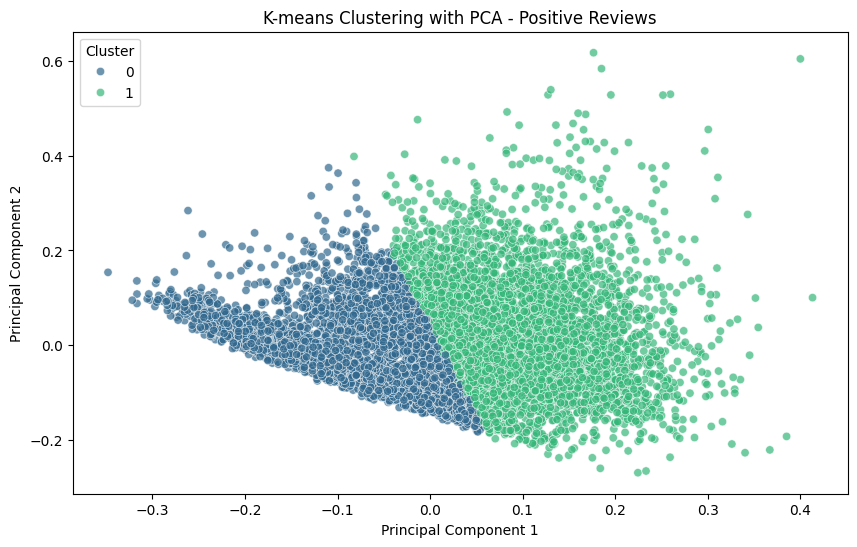

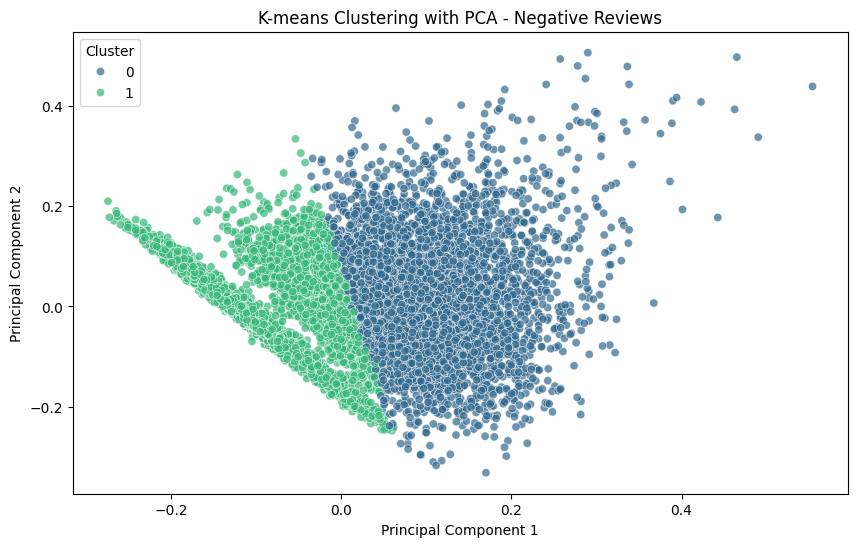

In [157]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Perform PCA to reduce dimensionality to 2 components for positive reviews
pca_positive = PCA(n_components=2)
pca_result_positive = pca_positive.fit_transform(tfidf_matrix_positive_reduced)

# Add the PCA components to the positive reviews DataFrame
positive_reviews['pca1'] = pca_result_positive[:, 0]
positive_reviews['pca2'] = pca_result_positive[:, 1]

# Perform PCA to reduce dimensionality to 2 components for negative reviews
pca_negative = PCA(n_components=2)
pca_result_negative = pca_negative.fit_transform(tfidf_matrix_negative_reduced)

# Add the PCA components to the negative reviews DataFrame
negative_reviews['pca1'] = pca_result_negative[:, 0]
negative_reviews['pca2'] = pca_result_negative[:, 1]

# Plot the clusters using PCA components for positive reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_kmeans', data=positive_reviews, palette='viridis', alpha=0.7)
plt.title('K-means Clustering with PCA - Positive Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Plot the clusters using PCA components for negative reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_kmeans', data=negative_reviews, palette='viridis', alpha=0.7)
plt.title('K-means Clustering with PCA - Negative Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


##  Hierarchical Clustering

In [158]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, cdist

# Create empty lists to store results
silhouette_scores = []
cohesion_values = []
separation_values = []

# Step 3: Hierarchical Clustering and Evaluation
k_values = [2]

# Convert the sparse matrix to a dense array
tfidf_matrix_dense_p = tfidf_matrix_positive_reduced

# Loop through different k values
for k in k_values:
    # Loop through different linkage methods
    linkage_methods = ['ward', 'complete', 'average', 'single']
    for linkage_method in linkage_methods:
        # Hierarchical Clustering
        hierarchical_cluster = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        cluster_labels = hierarchical_cluster.fit_predict(tfidf_matrix_dense_p)

        # Calculate silhouette score
        silhouette = silhouette_score(tfidf_matrix_dense_p, cluster_labels)

        # Calculate pairwise distances
        pairwise_distances = pdist(tfidf_matrix_dense_p)

        # Initialize cohesion
        cohesion = 0

        # Calculate cohesion and separation
        for i in range(k):
            cluster_data = tfidf_matrix_dense_p[cluster_labels == i]
            if len(cluster_data) > 0:  # check if cluster is not empty
                cluster_center = cluster_data.mean(axis=0)
                intra_cluster_distances = cdist(cluster_data, [cluster_center], 'euclidean')
                cohesion += intra_cluster_distances.sum()

        # Calculate separation
        separation = np.sum(pairwise_distances) - cohesion

        # Print and/or store the evaluation metrics
        print(f"Metrics for k={k}, linkage={linkage_method}:")
        print(f"Silhouette Score: {silhouette}")
        print(f"Cohesion: {cohesion}")
        print(f"Separation: {separation}")
        print("-----------------------------")

        # Store the results in lists
        silhouette_scores.append({'k': k, 'linkage': linkage_method, 'silhouette': silhouette})
        cohesion_values.append({'k': k, 'linkage': linkage_method, 'cohesion': cohesion})
        separation_values.append({'k': k, 'linkage': linkage_method, 'separation': separation})



Metrics for k=2, linkage=ward:
Silhouette Score: 0.043255123029723334
Cohesion: 3334.0191700055
Separation: 24164407.899345182
-----------------------------
Metrics for k=2, linkage=complete:
Silhouette Score: 0.050120462677223955
Cohesion: 3361.111315616096
Separation: 24164380.80719957
-----------------------------
Metrics for k=2, linkage=average:
Silhouette Score: 0.344937322186296
Cohesion: 3411.873022937926
Separation: 24164330.04549225
-----------------------------
Metrics for k=2, linkage=single:
Silhouette Score: 0.3089011286699993
Cohesion: 3411.9248557691
Separation: 24164329.993659418
-----------------------------


In [159]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, cdist

# Create empty lists to store results
silhouette_scores = []
cohesion_values = []
separation_values = []

# Step 3: Hierarchical Clustering and Evaluation
k_values = [3,4]

# Convert the sparse matrix to a dense array
tfidf_matrix_dense_p = tfidf_matrix_positive_reduced

# Loop through different k values
for k in k_values:
    # Loop through different linkage methods
    linkage_methods = ['ward', 'complete', 'average', 'single']
    for linkage_method in linkage_methods:
        # Hierarchical Clustering
        hierarchical_cluster = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        cluster_labels = hierarchical_cluster.fit_predict(tfidf_matrix_dense_p)

        # Calculate silhouette score
        silhouette = silhouette_score(tfidf_matrix_dense_p, cluster_labels)

        # Calculate pairwise distances
        pairwise_distances = pdist(tfidf_matrix_dense_p)

        # Initialize cohesion
        cohesion = 0

        # Calculate cohesion and separation
        for i in range(k):
            cluster_data = tfidf_matrix_dense_p[cluster_labels == i]
            if len(cluster_data) > 0:  # check if cluster is not empty
                cluster_center = cluster_data.mean(axis=0)
                intra_cluster_distances = cdist(cluster_data, [cluster_center], 'euclidean')
                cohesion += intra_cluster_distances.sum()

        # Calculate separation
        separation = np.sum(pairwise_distances) - cohesion

        # Print and/or store the evaluation metrics
        print(f"Metrics for k={k}, linkage={linkage_method}:")
        print(f"Silhouette Score: {silhouette}")
        print(f"Cohesion: {cohesion}")
        print(f"Separation: {separation}")
        print("-----------------------------")

        # Store the results in lists
        silhouette_scores.append({'k': k, 'linkage': linkage_method, 'silhouette': silhouette})
        cohesion_values.append({'k': k, 'linkage': linkage_method, 'cohesion': cohesion})
        separation_values.append({'k': k, 'linkage': linkage_method, 'separation': separation})



Metrics for k=3, linkage=ward:
Silhouette Score: 0.02894582664009423
Cohesion: 3287.087658743276
Separation: 24164454.830856442
-----------------------------
Metrics for k=3, linkage=complete:
Silhouette Score: 0.04647612880831914
Cohesion: 3341.6005587166865
Separation: 24164400.31795647
-----------------------------
Metrics for k=3, linkage=average:
Silhouette Score: 0.2961370972329509
Cohesion: 3411.2540629286277
Separation: 24164330.66445226
-----------------------------
Metrics for k=3, linkage=single:
Silhouette Score: 0.23408557627145285
Cohesion: 3411.385858239434
Separation: 24164330.53265695
-----------------------------
Metrics for k=4, linkage=ward:
Silhouette Score: 0.020327614513642296
Cohesion: 3245.0002937525037
Separation: 24164496.918221433
-----------------------------
Metrics for k=4, linkage=complete:
Silhouette Score: 0.03614312755350976
Cohesion: 3313.2751059833627
Separation: 24164428.643409204
-----------------------------
Metrics for k=4, linkage=average:
Silh

In [160]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import silhouette_score

# Create empty lists to store results
silhouette_scores = []
cohesion_values = []
separation_values = []

# Step 3: Hierarchical Clustering and Evaluation
k_values = [2, 3, 5]

# Convert the sparse matrix to a dense array
tfidf_matrix_dense_n = tfidf_matrix_negative_reduced

# Loop through different k values
for k in k_values:
    # Loop through different linkage methods
    linkage_methods = ['ward', 'complete', 'average', 'single']
    for linkage_method in linkage_methods:
        # Hierarchical Clustering
        hierarchical_cluster = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        cluster_labels = hierarchical_cluster.fit_predict(tfidf_matrix_dense_n)

        # Calculate silhouette score
        silhouette = silhouette_score(tfidf_matrix_dense_n, cluster_labels)

        # Calculate pairwise distances
        pairwise_distances = pdist(tfidf_matrix_dense_n)

        # Initialize cohesion
        cohesion = 0

        # Calculate cohesion and separation
        for i in range(k):
            cluster_data = tfidf_matrix_dense_n[cluster_labels == i]
            if len(cluster_data) > 0:  # check if cluster is not empty
                cluster_center = cluster_data.mean(axis=0)
                intra_cluster_distances = cdist(cluster_data, [cluster_center], 'euclidean')
                cohesion += intra_cluster_distances.sum()

        # Calculate separation
        separation = np.sum(pairwise_distances) - cohesion

        # Print and/or store the evaluation metrics
        print(f"Metrics for k={k}, linkage={linkage_method}:")
        print(f"Silhouette Score: {silhouette}")
        print(f"Cohesion: {cohesion}")
        print(f"Separation: {separation}")
        print("-----------------------------")

        # Store the results in lists
        silhouette_scores.append({'k': k, 'linkage': linkage_method, 'silhouette': silhouette})
        cohesion_values.append({'k': k, 'linkage': linkage_method, 'cohesion': cohesion})
        separation_values.append({'k': k, 'linkage': linkage_method, 'separation': separation})



Metrics for k=2, linkage=ward:
Silhouette Score: 0.04489743898982214
Cohesion: 3272.797013120431
Separation: 23681665.967141673
-----------------------------
Metrics for k=2, linkage=complete:
Silhouette Score: 0.3717263118277006
Cohesion: 3351.306894729397
Separation: 23681587.45726006
-----------------------------
Metrics for k=2, linkage=average:
Silhouette Score: 0.3359820871832975
Cohesion: 3351.233138177224
Separation: 23681587.531016614
-----------------------------
Metrics for k=2, linkage=single:
Silhouette Score: 0.40760578264684094
Cohesion: 3351.8520588170586
Separation: 23681586.912095975
-----------------------------
Metrics for k=3, linkage=ward:
Silhouette Score: 0.035596779098025125
Cohesion: 3216.211899551462
Separation: 23681722.55225524
-----------------------------
Metrics for k=3, linkage=complete:
Silhouette Score: 0.21688919773968152
Cohesion: 3335.3246308498287
Separation: 23681603.439523943
-----------------------------
Metrics for k=3, linkage=average:
Silhou

In [161]:
# Hierarchical Clustering for positive reviews
hc_model_positive = AgglomerativeClustering(n_clusters=2, linkage='average')
positive_reviews['cluster_hc'] = hc_model_positive.fit_predict(tfidf_matrix_dense_p)

# Hierarchical Clustering for negative reviews
hc_model_negative = AgglomerativeClustering(n_clusters=2, linkage='single')
negative_reviews['cluster_hc'] = hc_model_negative.fit_predict(tfidf_matrix_dense_n)

In [162]:
# Print hierarchical clustering labels and counts for positive reviews
hc_labels_positive = hc_model_positive.labels_
print("Hierarchical Clustering Labels for Positive Reviews:")
print(hc_labels_positive)

hc_cluster_counts_positive = pd.Series(hc_labels_positive).value_counts()
print("\nCounts of Instances in Each Hierarchical Cluster for Positive Reviews:")
for label, count in hc_cluster_counts_positive.items():
    print(f"Cluster {label}: {count} instances")

# Print hierarchical clustering labels and counts for negative reviews
hc_labels_negative = hc_model_negative.labels_
print("\nHierarchical Clustering Labels for Negative Reviews:")
print(hc_labels_negative)

hc_cluster_counts_negative = pd.Series(hc_labels_negative).value_counts()
print("\nCounts of Instances in Each Hierarchical Cluster for Negative Reviews:")
for label, count in hc_cluster_counts_negative.items():
    print(f"Cluster {label}: {count} instances")

Hierarchical Clustering Labels for Positive Reviews:
[0 0 0 ... 0 0 0]

Counts of Instances in Each Hierarchical Cluster for Positive Reviews:
Cluster 0: 9977 instances
Cluster 1: 1 instances

Hierarchical Clustering Labels for Negative Reviews:
[0 0 0 ... 0 0 0]

Counts of Instances in Each Hierarchical Cluster for Negative Reviews:
Cluster 0: 9955 instances
Cluster 1: 1 instances


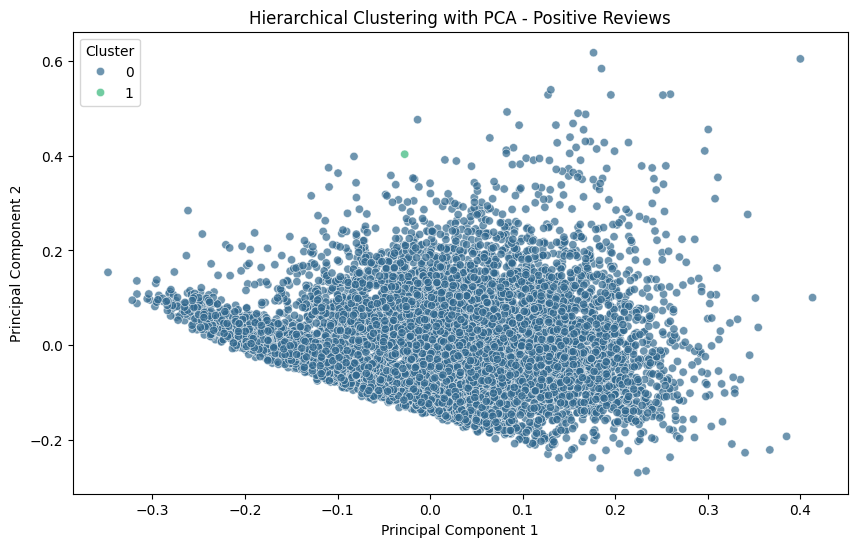

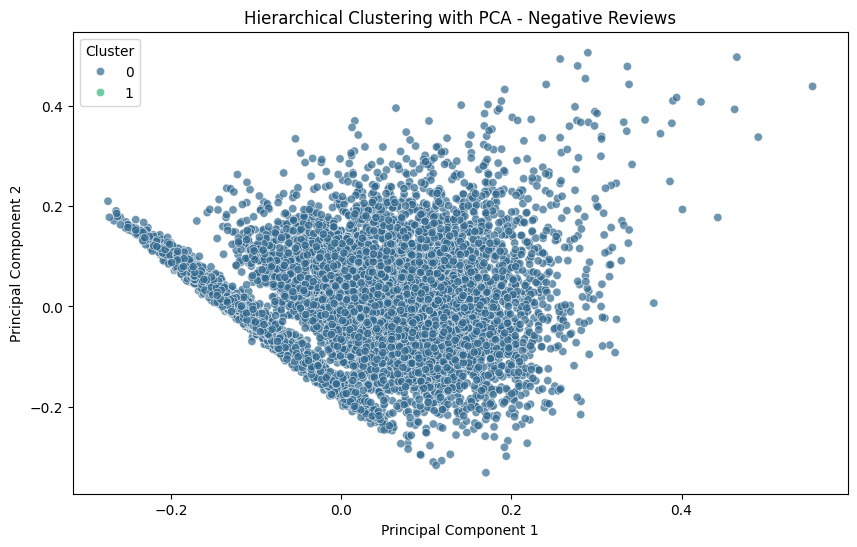

In [163]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize PCA for positive reviews
pca_positive = PCA(n_components=2)

# Initialize PCA for negative reviews
pca_negative = PCA(n_components=2)

# Perform PCA for positive reviews
pca_result_positive = pca_positive.fit_transform(tfidf_matrix_positive_reduced)
positive_reviews['pca1'] = pca_result_positive[:, 0]
positive_reviews['pca2'] = pca_result_positive[:, 1]

# Perform PCA for negative reviews
pca_result_negative = pca_negative.fit_transform(tfidf_matrix_negative_reduced)
negative_reviews['pca1'] = pca_result_negative[:, 0]
negative_reviews['pca2'] = pca_result_negative[:, 1]

# Plot the clusters using PCA components for positive reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_hc', data=positive_reviews, palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering with PCA - Positive Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Plot the clusters using PCA components for negative reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_hc', data=negative_reviews, palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering with PCA - Negative Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [164]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist, squareform

# Calculate Euclidean distances for positive reviews
distance_matrix_positive = pdist(tfidf_matrix_positive_reduced, metric='euclidean')

# 'distance_matrix_positive' now contains the pairwise Euclidean distances between positive reviews
print("Distance Matrix for Positive Reviews:")
print(distance_matrix_positive)

# Calculate Euclidean distances for negative reviews
num_samples_negative = tfidf_matrix_negative.shape[0]
distance_matrix_negative = pdist(tfidf_matrix_negative_reduced, metric='euclidean')

# 'distance_matrix_negative' now contains the pairwise Euclidean distances between negative reviews
print("Distance Matrix for Negative Reviews:")
print(distance_matrix_negative)

Distance Matrix for Positive Reviews:
[0.51999809 0.60170012 0.47839026 ... 0.45574787 0.39692566 0.44641702]
Distance Matrix for Negative Reviews:
[0.41631472 0.35152201 0.51575636 ... 0.56930283 0.49587785 0.5275826 ]


In [165]:
import sys

# Set the maximum recursion depth to, e.g., 100_000
sys.setrecursionlimit(100_000)

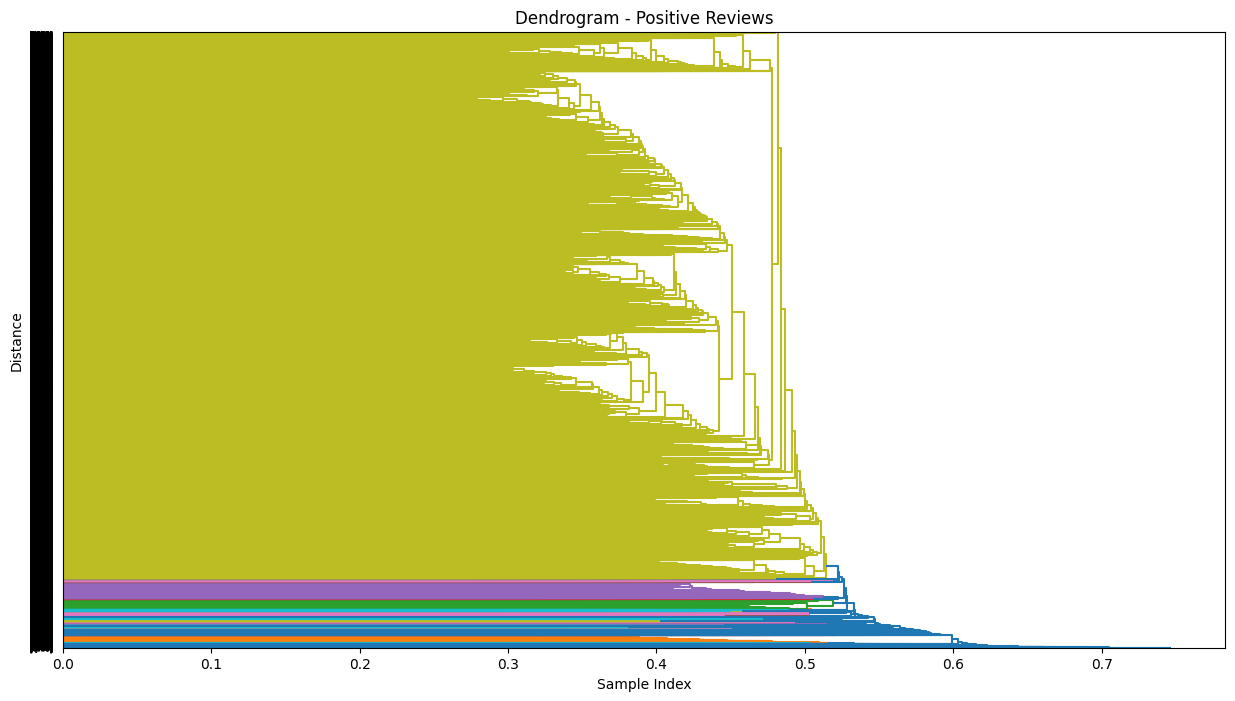

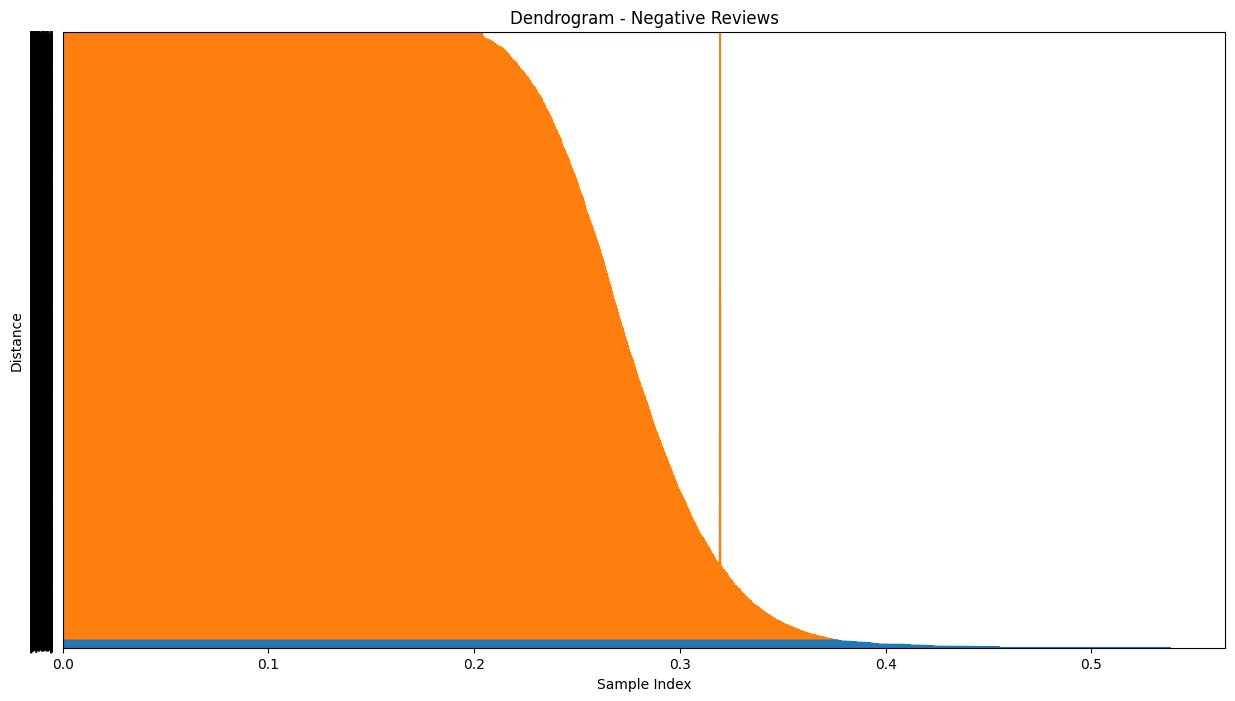

In [166]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def llf(id):
    return '[%s]' % (id)

# Function to plot dendrogram
def plot_dendrogram(linkage_matrix, labels, title):
    plt.figure(figsize=(15, 8))
    dendrogram(linkage_matrix, labels=labels, leaf_label_func=llf, orientation='right', leaf_font_size=5)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Plot dendrogram for positive reviews
linkage_matrix_positive = linkage(distance_matrix_positive, 'average')
plot_dendrogram(linkage_matrix_positive, labels=positive_reviews.index, title='Dendrogram - Positive Reviews')

# Plot dendrogram for negative reviews
linkage_matrix_negative = linkage(distance_matrix_negative, 'single')
plot_dendrogram(linkage_matrix_negative, labels=negative_reviews.index, title='Dendrogram - Negative Reviews')

## DBSCAN

In [167]:
## from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np


# Range of epsilon values to try
epsilon_values = np.arange(0.1, 2.0, 0.1)

# Range of min_samples values to try
min_samples_values = range(5, 30, 5)

# Initialize lists to store results for positive reviews
results_positive = []

# Loop through different epsilon values for positive reviews
for epsilon in epsilon_values:
    # Loop through different min_samples values for positive reviews
    for min_samples in min_samples_values:
        # DBSCAN Clustering for positive reviews
        dbscan_positive = DBSCAN(eps=epsilon, min_samples=min_samples)
        cluster_labels_positive = dbscan_positive.fit_predict(tfidf_matrix_positive_reduced)

        # Check if more than one cluster is formed for positive reviews
        if len(set(cluster_labels_positive)) > 1:
            # Calculate silhouette score for positive reviews
            silhouette_positive = silhouette_score(tfidf_matrix_positive_reduced, cluster_labels_positive)
            results_positive.append({'epsilon': epsilon, 'min_samples': min_samples, 'silhouette': silhouette_positive})

# Initialize lists to store results for negative reviews
results_negative = []

# Loop through different epsilon values for negative reviews
for epsilon in epsilon_values:
    # Loop through different min_samples values for negative reviews
    for min_samples in min_samples_values:
        # DBSCAN Clustering for negative reviews
        dbscan_negative = DBSCAN(eps=epsilon, min_samples=min_samples)
        cluster_labels_negative = dbscan_negative.fit_predict(tfidf_matrix_negative_reduced)

        # Check if more than one cluster is formed for negative reviews
        if len(set(cluster_labels_negative)) > 1:
            # Calculate silhouette score for negative reviews
            silhouette_negative = silhouette_score(tfidf_matrix_negative_reduced, cluster_labels_negative)
            results_negative.append({'epsilon': epsilon, 'min_samples': min_samples, 'silhouette': silhouette_negative})

# Print the results for positive reviews
print("Results for Positive Reviews:")
for result in results_positive:
    print(f"Parameters: Epsilon={result['epsilon']}, Min Samples={result['min_samples']}, Silhouette Score={result['silhouette']}")

# Print the results for negative reviews
print("\nResults for Negative Reviews:")
for result in results_negative:
    print(f"Parameters: Epsilon={result['epsilon']}, Min Samples={result['min_samples']}, Silhouette Score={result['silhouette']}")


Results for Positive Reviews:
Parameters: Epsilon=0.2, Min Samples=5, Silhouette Score=-0.20649844839190712
Parameters: Epsilon=0.2, Min Samples=10, Silhouette Score=-0.16279976780574468
Parameters: Epsilon=0.2, Min Samples=15, Silhouette Score=-0.16279976780574468
Parameters: Epsilon=0.30000000000000004, Min Samples=5, Silhouette Score=0.08854076743365932
Parameters: Epsilon=0.30000000000000004, Min Samples=10, Silhouette Score=0.08581407627818954
Parameters: Epsilon=0.30000000000000004, Min Samples=15, Silhouette Score=0.08363061957357731
Parameters: Epsilon=0.30000000000000004, Min Samples=20, Silhouette Score=0.08209694096891619
Parameters: Epsilon=0.30000000000000004, Min Samples=25, Silhouette Score=0.08065885549815183
Parameters: Epsilon=0.4, Min Samples=5, Silhouette Score=0.24253948641502357
Parameters: Epsilon=0.4, Min Samples=10, Silhouette Score=0.2418101580698332
Parameters: Epsilon=0.4, Min Samples=15, Silhouette Score=0.2407728351611557
Parameters: Epsilon=0.4, Min Sampl

In [168]:
from sklearn.cluster import DBSCAN

# Selected hyperparameters for positive reviews
epsilon_positive = 0.4
min_samples_positive = 5

# Selected hyperparameters for negative reviews
epsilon_negative = 0.5
min_samples_negative = 5

# DBSCAN Clustering for positive reviews
dbscan_positive = DBSCAN(eps=epsilon_positive, min_samples=min_samples_positive)
positive_reviews['cluster_dbscan'] = dbscan_positive.fit_predict(tfidf_matrix_positive_reduced)

# DBSCAN Clustering for negative reviews
dbscan_negative = DBSCAN(eps=epsilon_negative, min_samples=min_samples_negative)
negative_reviews['cluster_dbscan'] = dbscan_negative.fit_predict(tfidf_matrix_negative_reduced)


In [169]:
# Print DBSCAN clustering labels for positive reviews
print("DBSCAN Clustering Labels for Positive Reviews:")
print(positive_reviews['cluster_dbscan'].values)

# Count occurrences of each DBSCAN clustering label for positive reviews
dbscan_cluster_counts_positive = positive_reviews['cluster_dbscan'].value_counts()

# Display the counts for positive reviews
print("\nCounts of Instances in Each DBSCAN Cluster for Positive Reviews:")
for label, count in dbscan_cluster_counts_positive.items():
    print(f"Cluster {label}: {count} instances")

# Print DBSCAN clustering labels for negative reviews
print("\nDBSCAN Clustering Labels for Negative Reviews:")
print(negative_reviews['cluster_dbscan'].values)

# Count occurrences of each DBSCAN clustering label for negative reviews
dbscan_cluster_counts_negative = negative_reviews['cluster_dbscan'].value_counts()

# Display the counts for negative reviews
print("\nCounts of Instances in Each DBSCAN Cluster for Negative Reviews:")
for label, count in dbscan_cluster_counts_negative.items():
    print(f"Cluster {label}: {count} instances")


DBSCAN Clustering Labels for Positive Reviews:
[0 0 0 ... 0 0 0]

Counts of Instances in Each DBSCAN Cluster for Positive Reviews:
Cluster 0: 9930 instances
Cluster -1: 48 instances

DBSCAN Clustering Labels for Negative Reviews:
[0 0 0 ... 0 0 0]

Counts of Instances in Each DBSCAN Cluster for Negative Reviews:
Cluster 0: 9955 instances
Cluster -1: 1 instances


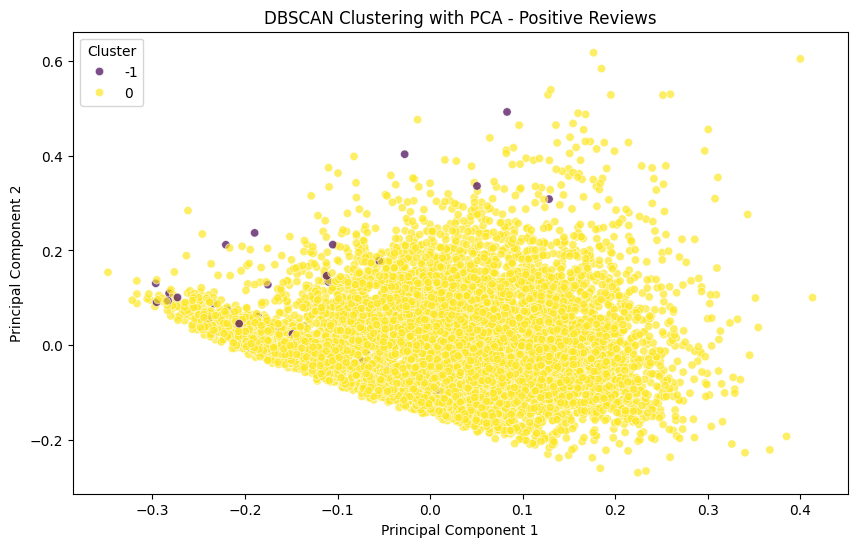

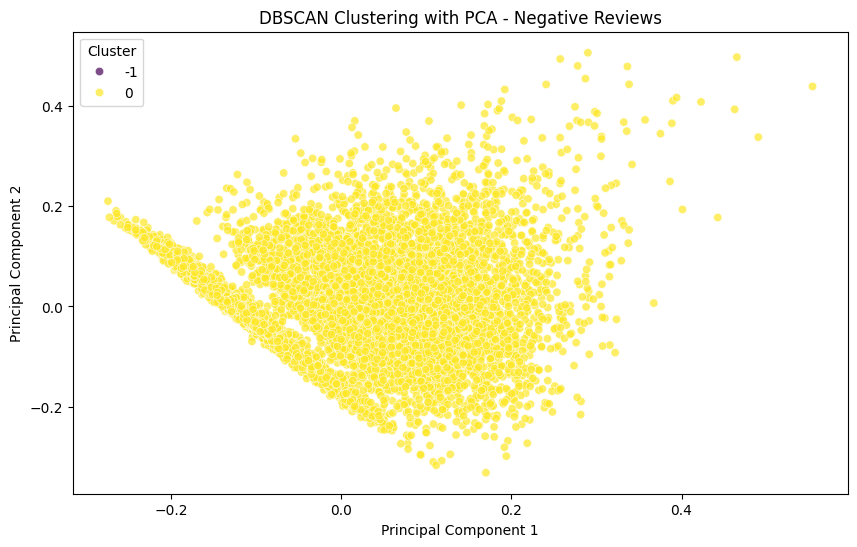

In [170]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Perform PCA to reduce dimensionality to 2 components for positive reviews
pca_positive = PCA(n_components=2)
pca_result_positive = pca_positive.fit_transform(tfidf_matrix_positive_reduced)

# Add the PCA components to the positive reviews DataFrame
positive_reviews['pca1'] = pca_result_positive[:, 0]
positive_reviews['pca2'] = pca_result_positive[:, 1]

# Plot the clusters using PCA components for positive reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_dbscan', data=positive_reviews, palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering with PCA - Positive Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Perform PCA to reduce dimensionality to 2 components for negative reviews
pca_negative = PCA(n_components=2)
pca_result_negative = pca_negative.fit_transform(tfidf_matrix_negative_reduced)

# Add the PCA components to the negative reviews DataFrame
negative_reviews['pca1'] = pca_result_negative[:, 0]
negative_reviews['pca2'] = pca_result_negative[:, 1]

# Plot the clusters using PCA components for negative reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_dbscan', data=negative_reviews, palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering with PCA - Negative Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## Cluster Exploration

In [171]:
positive_cluster_1 = positive_reviews.loc[positive_reviews['cluster_hc'] == 1, 'review']
negative_cluster_1 = negative_reviews.loc[negative_reviews['cluster_hc'] == 1, 'review']

# Display the comments in Cluster 1 for positive reviews
print("Comments in Cluster 1 for Positive Reviews:")
for comment in positive_cluster_1:
    print(comment)
    print("------------------------")

# Display the comments in Cluster 1 for negative reviews
print("\nComments in Cluster 1 for Negative Reviews:")
for comment in negative_cluster_1:
    print(comment)
    print("------------------------")

Comments in Cluster 1 for Positive Reviews:
i thought this movie was really really great! Helena did an amazing job in it! I thought she played her character very well! she's an AWESOME actress!! :)<br /><br />the movie was also really funny too! The jokes were great! i couldnt stop laughing! :)<br /><br />i think everyone should see it... :)<br /><br />
------------------------

Comments in Cluster 1 for Negative Reviews:
I had to watch this movie for professional reasons and can only say it's a complete waste of time. When running, Baldwin looks like an ape, Characters are dull, same story has been told 1000 times better in other movies. I think everything has been now said about this film, but IMDb requires me to write 10 lines. So:Boring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBor